¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

# Carga de Liberias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy import stats as st
from scipy.stats import levene

# Carga de Datos a Python

In [2]:
name_taxi = pd.read_csv("moved_project_sql_result_01.csv")
viaje_taxi = pd.read_csv("moved_project_sql_result_04.csv")
clima_taxi = pd.read_csv("moved_project_sql_result_07.csv")

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con la carga de las bases de datos con las que vamos a trabajr y con las librerias



# Preparar Datos

In [3]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Revision de Duplicados")
    print(datos.duplicated().sum())

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el analisis de duplicados

## Compañia y cantidad de viajes

In [4]:
info_gral(name_taxi)

Primeras Filas
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Revision de Datos Ausentes
company_name    0
trips_amount    0
dtype: int64

Revision de Duplicados
0


In [5]:
top_compañias = ( name_taxi.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).head(10).reset_index())

print(top_compañias)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


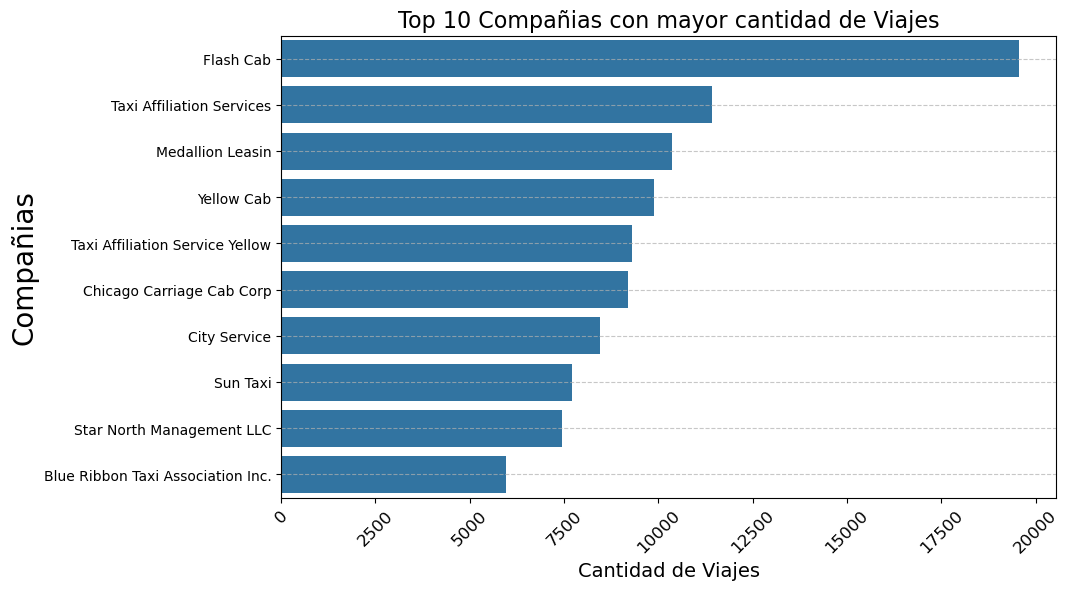

In [6]:
# Crear gráfica de barras
plt.figure(figsize=(10, 6))

sns.barplot(data=top_compañias, x='trips_amount', y='company_name')

# Personalizar la gráfica
plt.title('Top 10 Compañias con mayor cantidad de Viajes', fontsize=16)
plt.xlabel('Cantidad de Viajes', fontsize=14)
plt.ylabel('Compañias', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Aqui no encontramos ni datos ausentes ni datos duplicados asi que lo dejamos como esta solo visualizamos e hicimos un analisis del top 10 empresas de taxis por número de viajes (15 y 16 de noviembre de 2017) en el cual en la grafica nos damos cuenta que Flash Cab es la que cuenta con mayor numero de viajes teniendo 19,558 viajes como se dificulta la lectura poniendo en X ya fuera poniendo letra mas chica o cambiando la inclinacion decidi colocarla en el eje Y los datos de las compañias e hice las letras un poco mas grandes para su mejor visualizacion.

## Barrios y promedio de viaje

In [7]:
info_gral(viaje_taxi)

Primeras Filas
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Revision de Datos Ausentes
dropoff_location_name    0
average_trips            0
dtype: int64

Revision de Duplicados
0


In [8]:
top_barrios = ( viaje_taxi.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).reset_index())

print(top_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


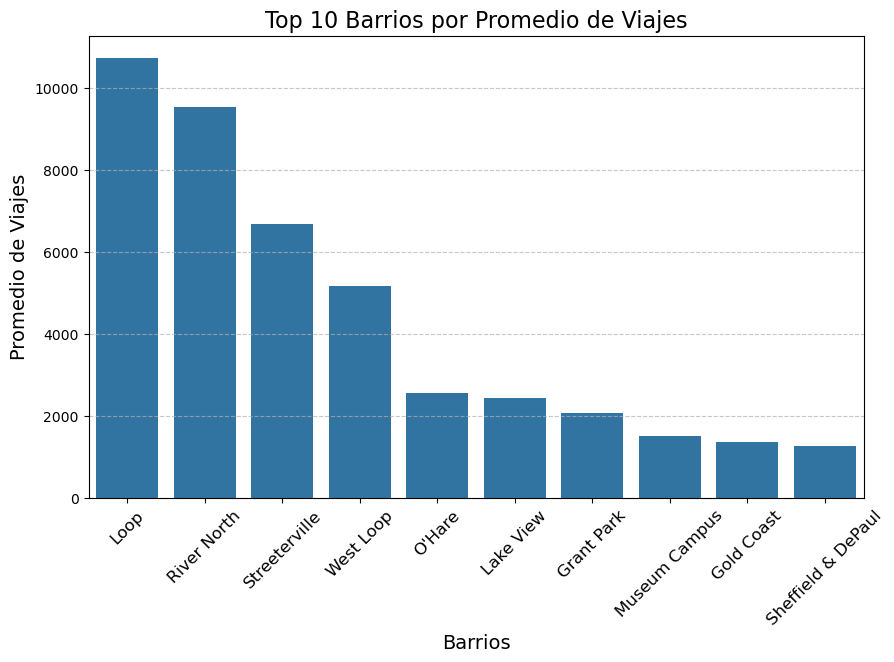

In [9]:
# Crear gráfica de barras
plt.figure(figsize=(10, 6))

sns.barplot(data=top_barrios, x='dropoff_location_name', y='average_trips')

# Personalizar la gráfica
plt.title('Top 10 Barrios por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrios', fontsize=14)
plt.ylabel('Promedio de Viajes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

Analizamos cuales son los barrios mas frecuentados por los taxis y lo graficamos para visualizar cual es el barrio mas frecuente que en este caso salio Loop como primer lugar con un promedio de viaje de 10,727 y asi sucesivamente, este archivo tampoco se encontraron ni datos ausentes ni datos duplicados. 

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

 Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10 empresas de taxis por número de viajes (15 y 16 de noviembre de 2017).</div>

<div class="alert alert-block alert-info">
<b>Listo agrege la tabla correspondiente en su lugar correspondiente que es la tabla anterior a esta asi como un comentario.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el ajuste!

## condiciones climaticas, duracion de viaje y Fecha y hora de corrida

In [10]:
info_gral(clima_taxi)

Primeras Filas
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Revision de Datos Ausentes
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Revision de Duplicados
197


Aqui encontramos 197 duplicados y actuamos para eliminarlos y tambien se visualizara y se revisara de nuevo para ver que ya no existen los duplicados.

In [11]:
clima_taxi = clima_taxi.drop_duplicates()

clima_taxi

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [12]:
clima_taxi.duplicated().sum()

0

In [13]:
clima_taxi['start_ts'] = pd.to_datetime(clima_taxi['start_ts'])

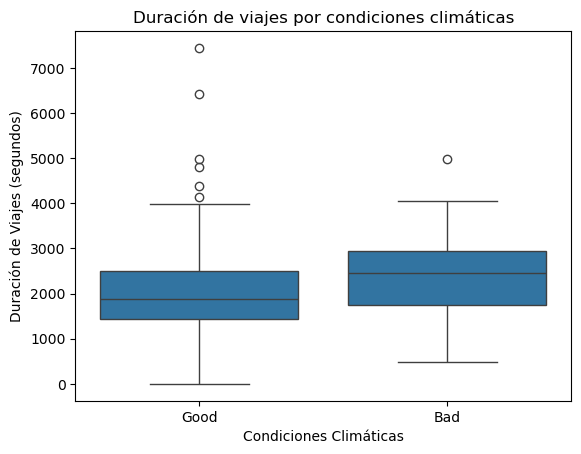

In [14]:
# Crear gráfica de comparación
sns.boxplot(data=clima_taxi, x='weather_conditions', y='duration_seconds')
plt.title('Duración de viajes por condiciones climáticas')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración de Viajes (segundos)')
plt.show()


Revisamos con un Boxplot como se visualizaban las tablas antes de seguir analizando y hacer nuestra hipotesis y notamos que en los dias buenos hay muchos valores a tipicos y en malos a pesar que solo es uno esta muy alejado del tercer cuartil Q3 asi que procedemos a eliminar los datos atipicos  

In [15]:
# Calcular los cuartiles y el IQR
Q1 = clima_taxi['duration_seconds'].quantile(0.25)
Q3 = clima_taxi['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Determinar los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores atípicos
df_sin_outliers = clima_taxi[(clima_taxi['duration_seconds'] >= limite_inferior) & (clima_taxi['duration_seconds'] <= limite_superior)]

# Resultados
print("Datos originales:")
print(clima_taxi)
print("Datos sin outliers:")
print(df_sin_outliers)

Datos originales:
                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    2017-11-25 12:00:00               Good            1543.0
3    2017-11-04 10:00:00               Good            2512.0
4    2017-11-11 07:00:00               Good            1440.0
...                  ...                ...               ...
1060 2017-11-04 14:00:00               Good            2700.0
1061 2017-11-18 16:00:00                Bad            2186.0
1063 2017-11-25 11:00:00               Good               0.0
1064 2017-11-11 10:00:00               Good            1318.0
1067 2017-11-04 16:00:00                Bad            2834.0

[871 rows x 3 columns]
Datos sin outliers:
                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    201

visualizamos hambas graficas para notar que si vemos una diferencia en cuanto a los valores atipicos eliminados y se hizo una nuevo DF corregido con los valores atipicos y procedemos a graficar un nuevo Boxplot sin valores atipicos 

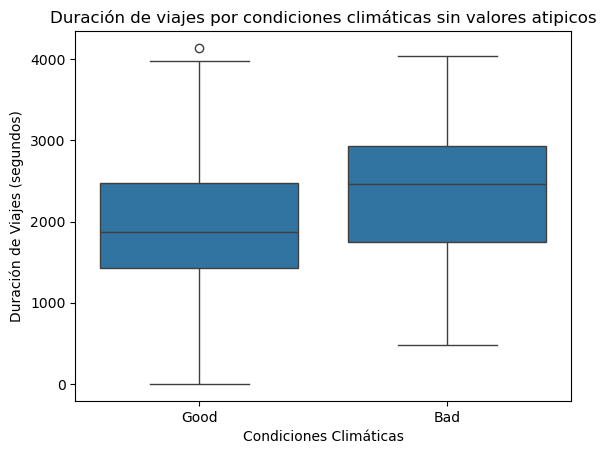

In [16]:
# Crear gráfica de comparación sin outliers
sns.boxplot(data=df_sin_outliers, x='weather_conditions', y='duration_seconds')
plt.title('Duración de viajes por condiciones climáticas sin valores atipicos')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración de Viajes (segundos)')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el análisis de valores atípicos

# Prueba de Hipotesis #1

Primero se pararemos los saturdays_bad (días lluviosos) y saturdays_good (días no lluviosos) para hacer nuestro analisis de las varianzas

In [17]:
saturdays_bad = df_sin_outliers[
    (df_sin_outliers['start_ts'].dt.day_name() == 'Saturday') &
    (df_sin_outliers['weather_conditions'] == 'Bad')
]['duration_seconds']

saturdays_good = df_sin_outliers[
    ~((df_sin_outliers['start_ts'].dt.day_name() == 'Saturday') & 
      (df_sin_outliers['weather_conditions'] == 'Good'))
]['duration_seconds']

## primera hipotesis veremos si la varianza de los dias lluviosos son iguales o diferentes 

H0: Las varianzas de los dos grupos son iguales. No hay diferencia significativa entre las varianzas de saturdays_bad (días lluviosos) y saturdays_good (días no lluviosos).
H1: Las varianzas de los dos grupos son diferentes. Existe una diferencia significativa entre las varianzas de saturdays_bad y saturdays_good.


In [18]:
varianza_saturdays = np.var(saturdays_bad, ddof=1)  # ddof=1 para obtener la varianza muestral
print("Varianza Satudays Bad Day:", varianza_saturdays)

Varianza Satudays Bad Day: 523113.9738141832


In [19]:
varianza_others = np.var(saturdays_good, ddof=1)  # ddof=1 para obtener la varianza muestral
print("Varianza Satudays Good Day:", varianza_saturdays)

Varianza Satudays Good Day: 523113.9738141832


Como podremos observar las varianzas son iguales por lo cual procedemos hacer tambien un analisis con la prueba de *levene* 

In [20]:
# Realizar la prueba de dos muestras con levene

stat, p_value = levene(saturdays_bad, saturdays_good)

# Resultado
alpha = 0.05
    
if p_value < alpha:
    print("Rechazar H0: Las varianzas son significativamente diferentes.")
else:
    print("No se puede rechazar H₀: Las varianzas no son significativamente diferentes.")

No se puede rechazar H₀: Las varianzas no son significativamente diferentes.


Aqui nos muestra que las varianzas no son diferentes quiere decir que son iguales.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo. Puedes seguir explorando esta herramienta en futuros proyectos. 
    
Sigue con el excelente trabajo!    

## Prueba de hipotesis 2

Procedemos hacer una Hipotesis para saber si los dias buenos HAY diferencia o NO

H0: NO hay diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y los demás días.
    (En otras palabras, las duraciones promedio son iguales.)

H1: Hay una diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y los demás días.
    (En otras palabras, las duraciones promedio son diferentes, )


In [21]:
# Realizar la prueba t de dos muestras
t_stat, p_value = st.ttest_ind(saturdays_bad, saturdays_good, equal_var=True)

# Resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazar H0: NO hay diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos. ")
else:
    print("No se puede rechazar H0 ")

No se puede rechazar H0 


Al analizar la varianza que son iguales procedemos a poner el equal_var=True para saber la hipotesis 2 la cual nos dice que *NO* hay diferencias signidicativas en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(saturdays_rainy, others)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-info">
<b>Ya lo corregui e hice unos cambios espero poderme a entender lo que hice o mi analisis. saludos y muchas gracias por la revision. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>